# **Importing Libiraries**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score ,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# **Upload Data**

In [77]:
df=pd.read_csv(r"C:\Users\asus\Downloads\diabetes (2).csv")

In [78]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data Exploration & Cleaning**

In [79]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [80]:
df.shape

(768, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

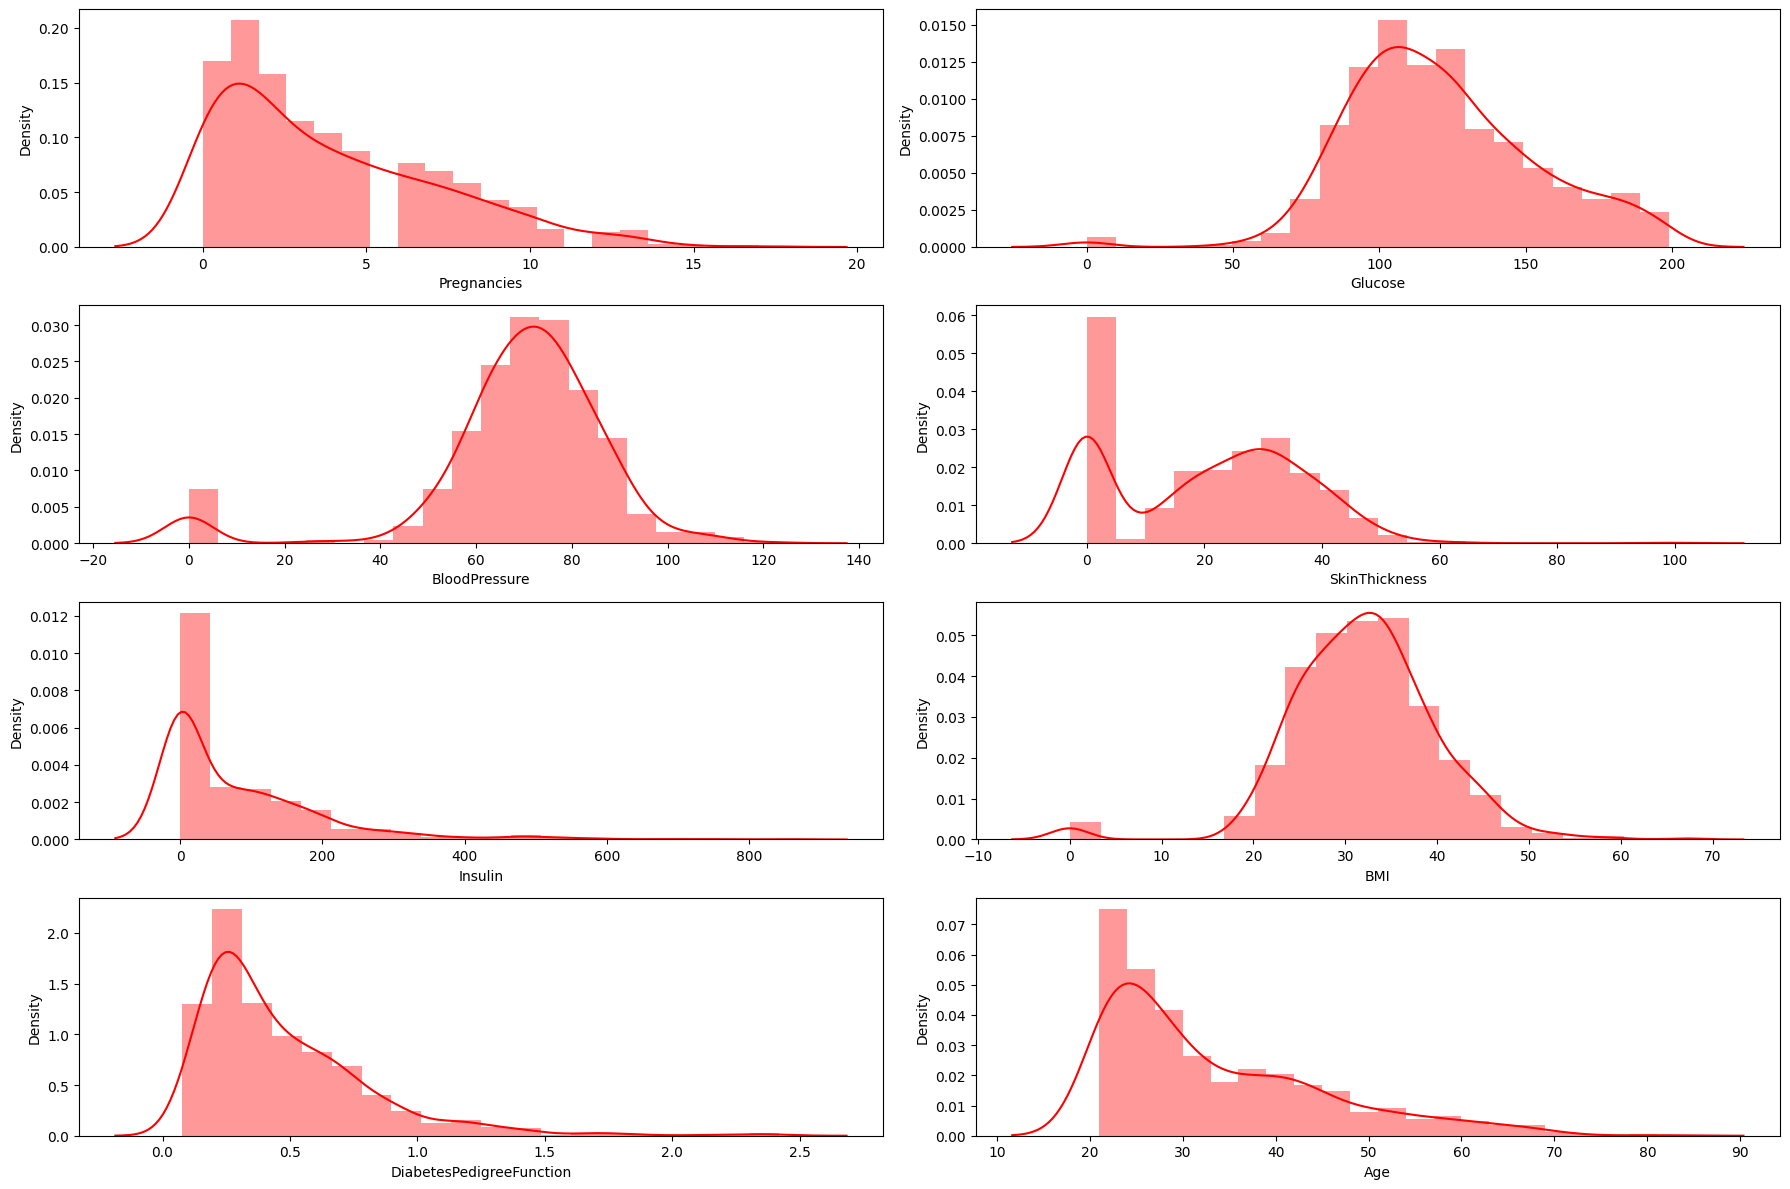

In [85]:
cols = [
    "Pregnancies", "Glucose",
    "BloodPressure", "SkinThickness",
    "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age"
]
fig,axes = plt.subplots(4,2, figsize=(18,12))
axes=axes.flatten()

for i,col in enumerate(cols):
  sns.distplot(df[col], bins=20, ax=axes[i], color="red")

plt.tight_layout()
plt.show()

In [86]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(exclude='number').columns

# **Data Visualization**

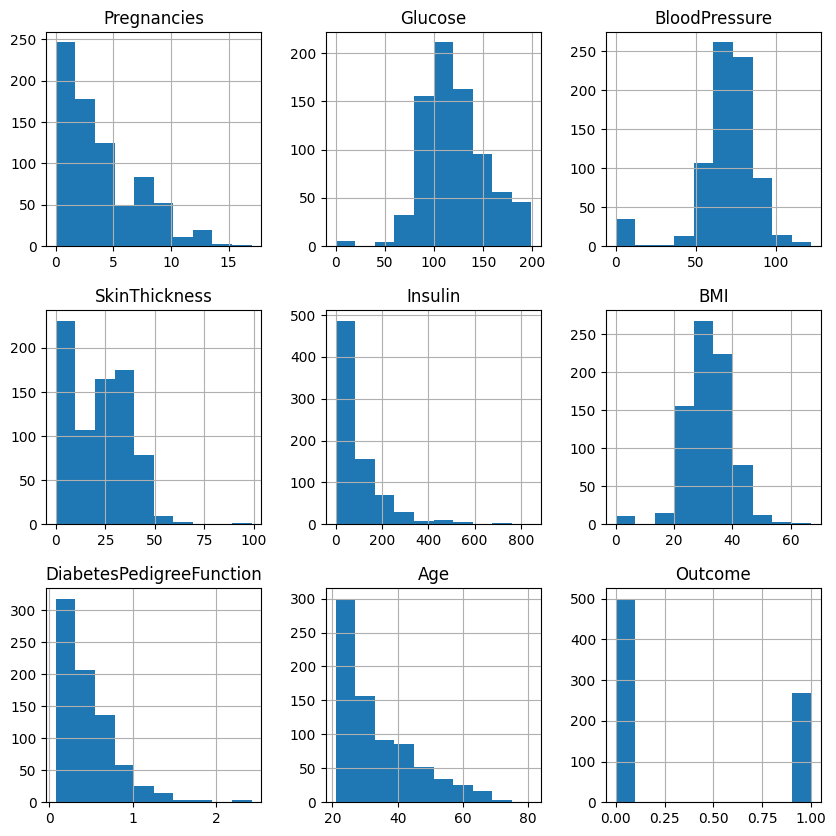

In [87]:
df.hist(figsize = (10,10))
plt.show()

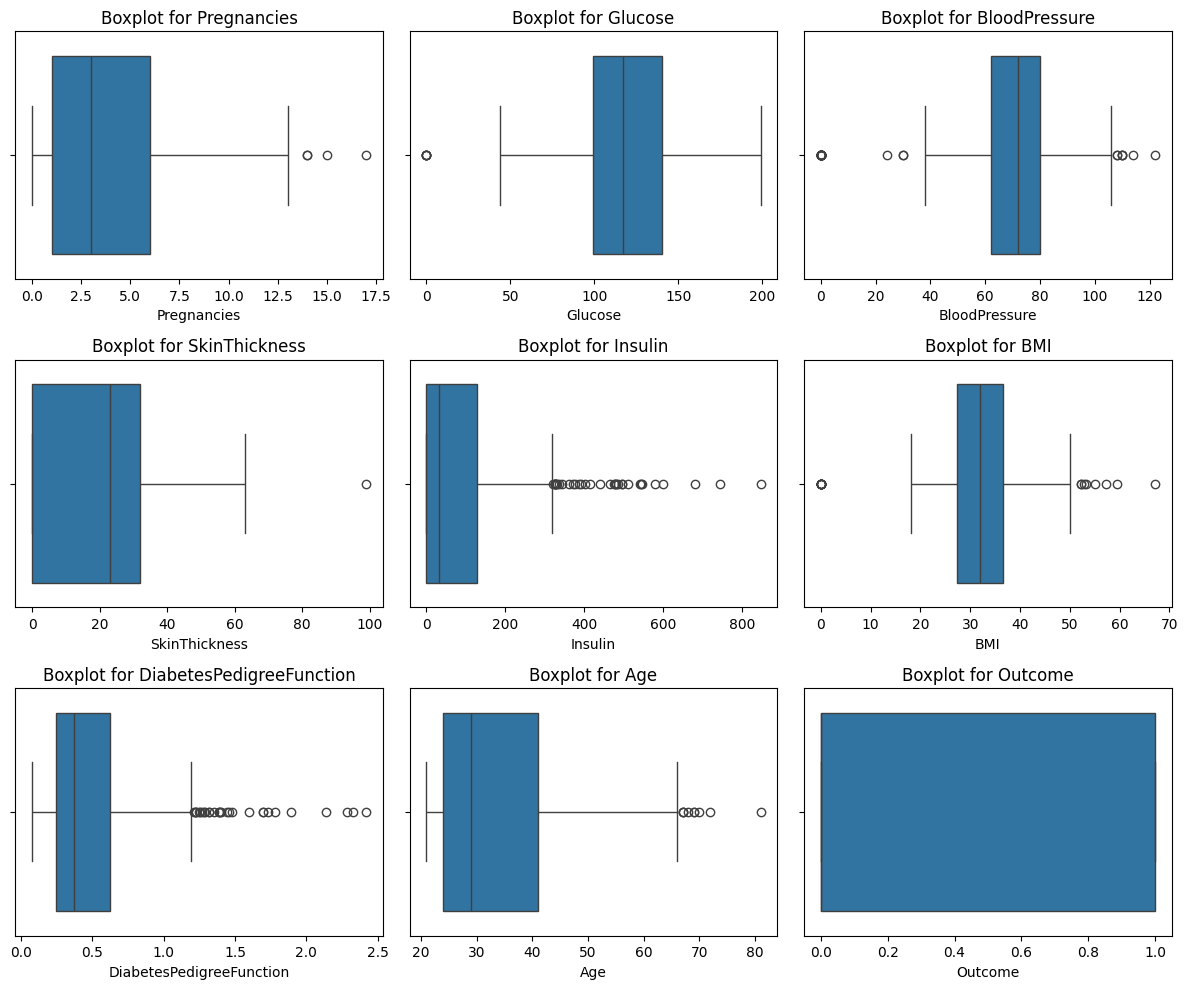

In [88]:
fig , axes = plt.subplots(3,3,figsize=(12,10))
axes= axes.flatten()

for i , col in enumerate(df.columns):
  sns.boxplot(data=df,x=col,ax=axes[i])
  axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

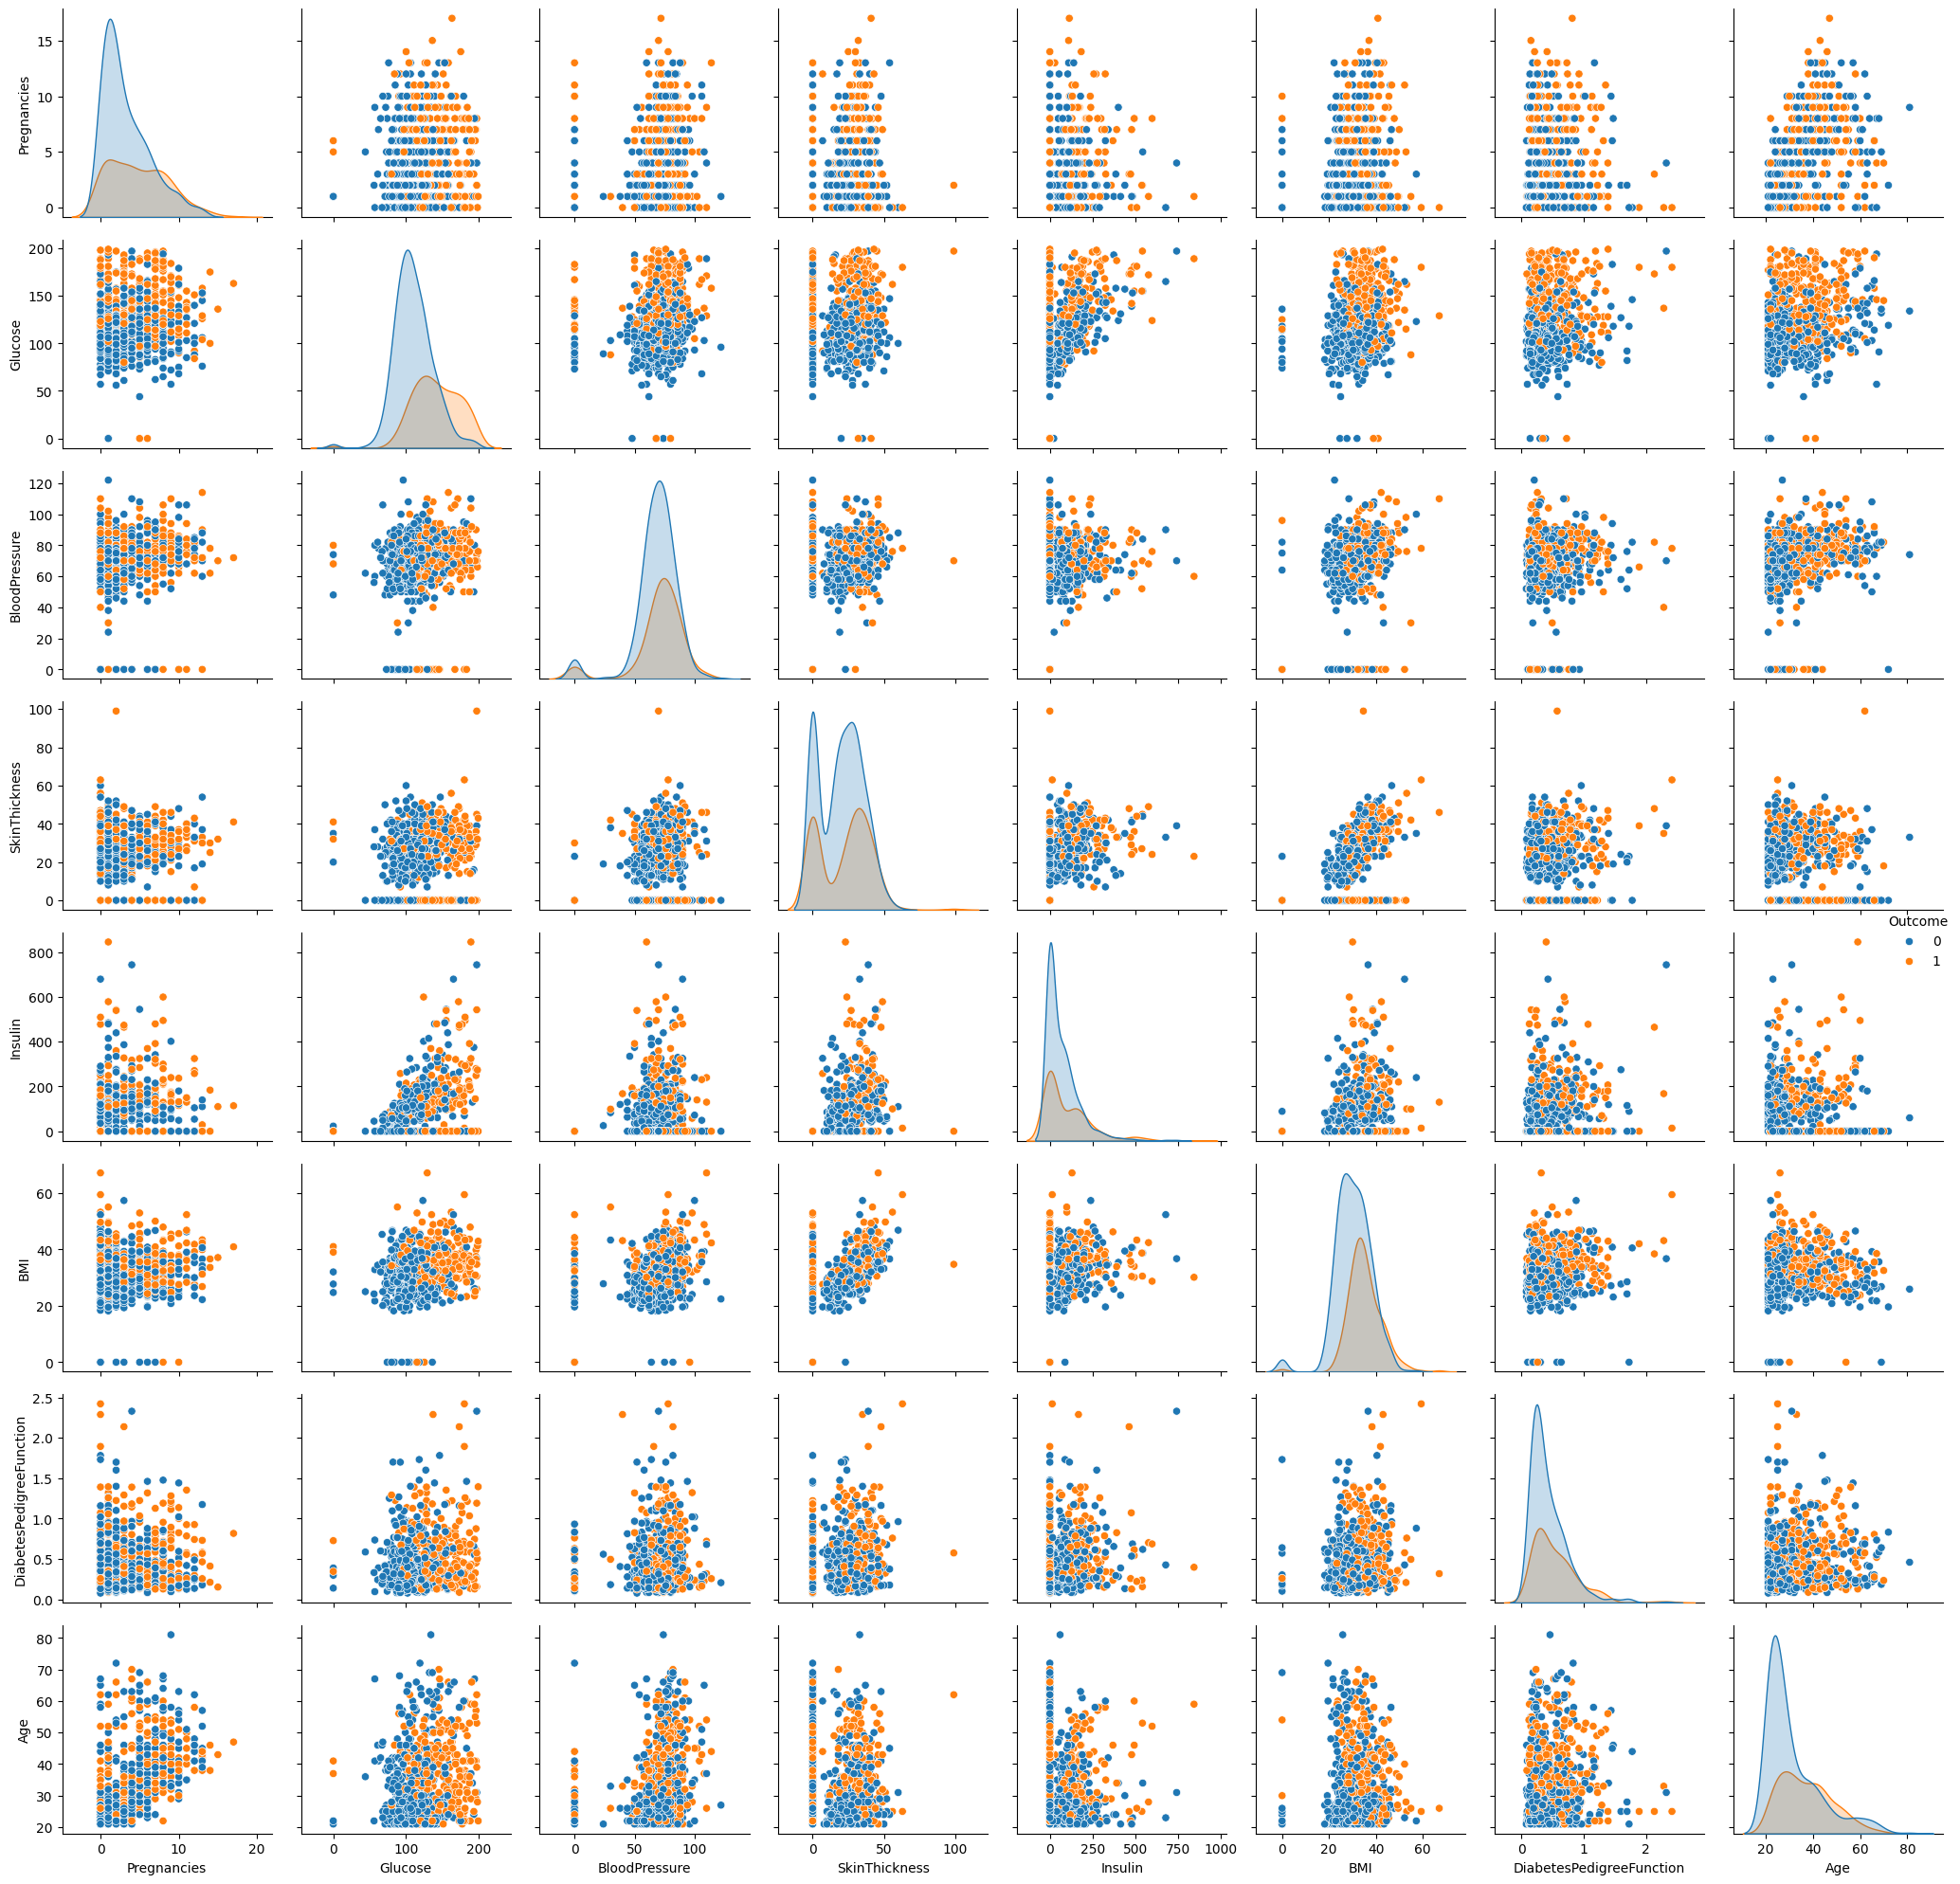

In [89]:
sns.pairplot(data = df, hue = 'Outcome' )
plt.tight_layout()
plt.show()

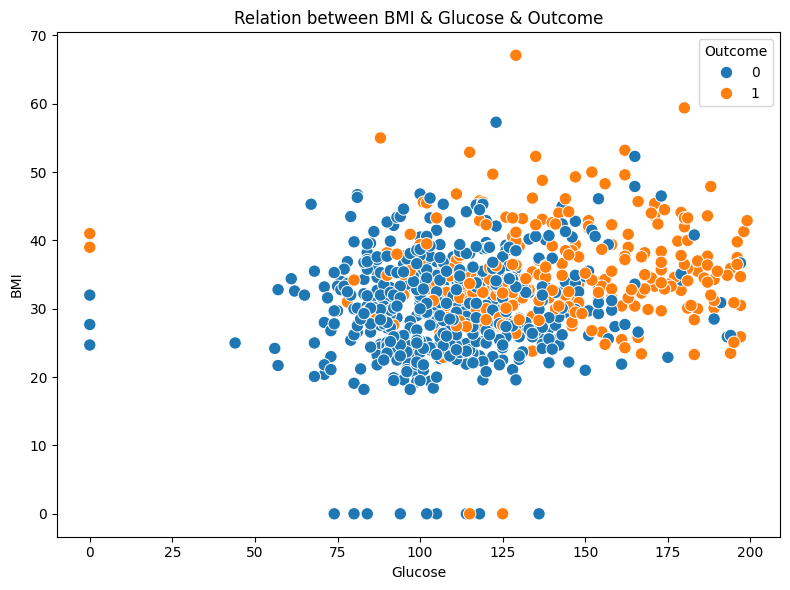

In [90]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df,x='Glucose',y='BMI',hue='Outcome',s=80)
plt.title('Relation between BMI & Glucose & Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

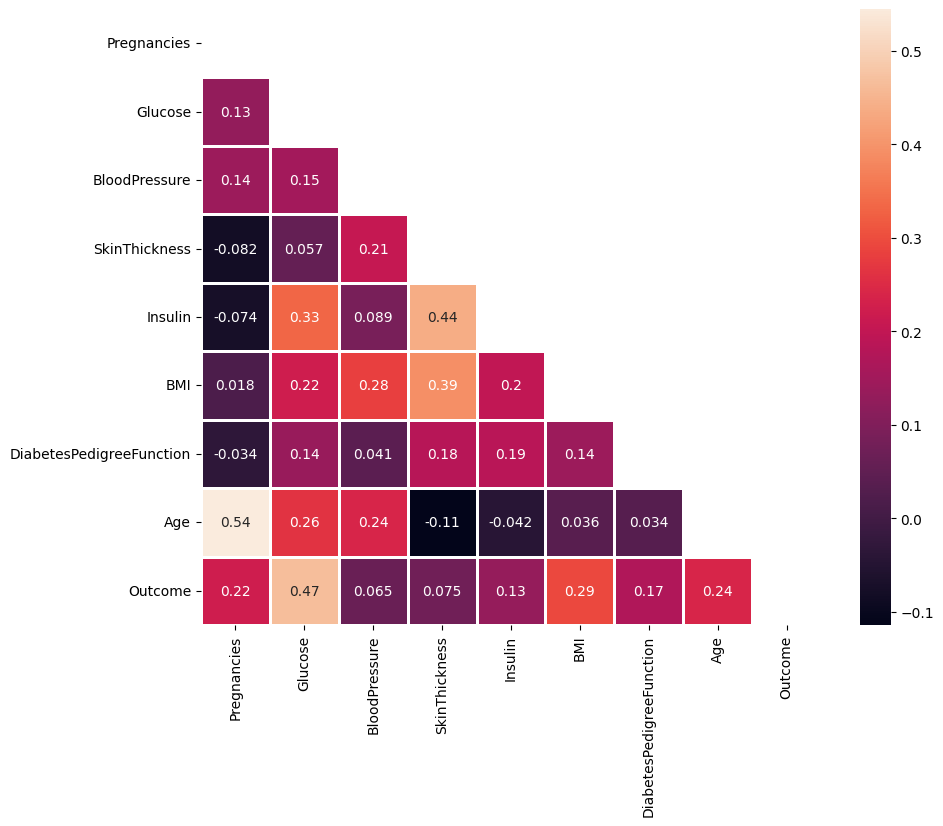

In [91]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

# **Data Preprocessing**

In [92]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [93]:
for col in cols :
  df[col]=df[col].replace(0,np.nan)

In [94]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [95]:
def median_target(col):
    temp= df[df[col].notnull()]
    temp = temp[[col, 'Outcome']].groupby(['Outcome'])[[col]].median().reset_index()
    return temp

In [96]:
for col in cols:

    temp = median_target(col)

    df.loc[(df['Outcome'] == 0) & (df[col].isnull()), col] = temp[col][0]
    df.loc[(df['Outcome'] == 1) & (df[col].isnull()), col] = temp[col][1]

In [97]:
columns=['Insulin', 'DiabetesPedigreeFunction']

for col in columns :
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR= Q3-Q1
  low_limit= Q1 - 1.5*IQR
  up_limit= Q3 + 1.5*IQR

  outliers=df[(df[col]<low_limit) | (df[col]> up_limit)][col]
  df[col] = np.where(df[col] < low_limit, low_limit, df[col])
  df[col] = np.where(df[col] > up_limit, up_limit, df[col])

In [98]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,1.200,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [99]:
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].round(2)


In [100]:
x=df.drop('Outcome',axis = 1)
y=df['Outcome']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Logistic Regression**

In [103]:
log_reg=LogisticRegression(penalty='l2',solver='liblinear', max_iter=200)

log_reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,200
,multi_class,'deprecated'


In [104]:
y_pred=log_reg.predict(x_test)


In [105]:
log_acc=accuracy_score(y_pred,y_test)
print(log_acc)

0.8441558441558441


In [106]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        99
           1       0.78      0.78      0.78        55

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154



# **KNN**

In [107]:
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [108]:
y_pred=knn.predict(x_test_scaled)

In [109]:
knn_acc=accuracy_score(y_pred,y_test)
print(knn_acc)

0.8636363636363636


In [110]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



# **Decision Tree**

In [111]:
DT = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=42)

DT.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [112]:
y_pred=DT.predict(x_test)

In [113]:
DT_acc=accuracy_score(y_pred,y_test)
print(DT_acc)

0.8636363636363636


In [114]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.81      0.80      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



# **Random Forest**

In [115]:
r_forest=RandomForestClassifier(n_estimators=200,max_depth=5 ,random_state=42)

r_forest.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
y_pred=r_forest.predict(x_test)

In [117]:
rforest_acc=accuracy_score(y_pred,y_test)
print(rforest_acc)

0.8961038961038961


In [118]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        99
           1       0.84      0.87      0.86        55

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154

